<a href="https://colab.research.google.com/github/HenryKang1/U-2-Net/blob/master/Saliented_object_detection_for_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the code for U-2-Net. This code for Sailent Object notebook.
Orginal github colde is https://github.com/levindabhi/U-2-Net.git 
For the make sure the Persistence, I use the forked version.

In [ ]:
!git clone https://github.com/HenryKang1/U-2-Net #https://github.com/levindabhi/U-2-Net.git

fatal: destination path 'U-2-Net' already exists and is not an empty directory.


First import the necessary code

In [ ]:
import gdown
import numpy as np
from PIL import Image
import IPython
import os
import sys

In [ ]:
url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
output = 'lip_final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
To: /content/lip_final.pth
267MB [00:01, 159MB/s]


'lip_final.pth'

Make the folder what I need need. 

In [ ]:
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp


!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

/content/U-2-Net
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/U-2-Net/saved_models/u2netp/u2netp.pth
4.68MB [00:00, 22.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
To: /content/U-2-Net/saved_models/u2net/u2net.pth
176MB [00:02, 71.1MB/s]
...load U2NEP---4.7 MB
/content


In [ ]:
print(os.getcwd())

/content


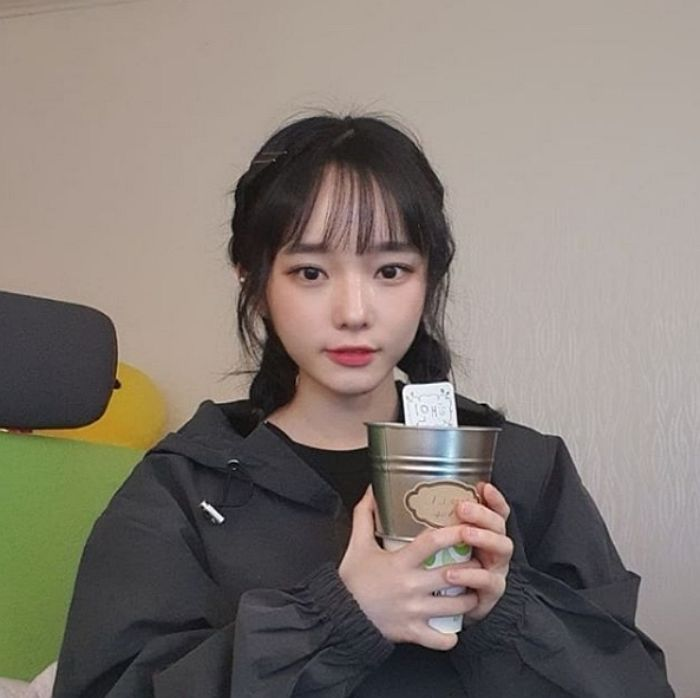



I use this image. She is the South korea model. If you would like to watch her show, you can see the follow link https://www.youtube.com/channel/UCrktsSopGh4xCdK1WrIKG8g

Let's make input output and middle processing folder. The U2Net use the specific size of image. If it become the real service it requires the more large input. However this is the tutorial, we will do not change it.

In [ ]:
!mkdir inputs
!mkdir data_preprocessing
!mkdir output
%cd inputs
from google.colab import files
uploaded = files.upload()


/content/inputs


Saving general.jpg to general.jpg


In [ ]:
name=os.listdir('/content/inputs/')
print(name)

['general.jpg']


In [ ]:
import cv2
img=Image.open('/content/inputs/'+name[0])
img = img.resize((192, 256), Image.BICUBIC).convert('RGB')


In [ ]:


img = img.save(os.path.join('/content/data_preprocessing/', '01.png'))

In [ ]:
u2net_run.infer(u2net, '/content/data_preprocessing/', '/content/outputs')

Generating mask for: 01.png
Saving output at /content/outputs/01.png


The input image and result.
This mask can use the various way. We can make the transparent background image.

Text(0.5, 1.0, 'General-SSo-Mask')

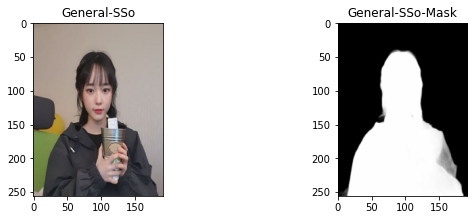

In [ ]:
output_img=Image.open('/content/outputs/'+'01.png')
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 7))
img=Image.open('/content/inputs/'+name[0])
img = img.resize((192, 256), Image.BICUBIC).convert('RGB')
fig.add_subplot(rows, columns, 1)
plt.title("General-SSo")
imshow(img)
fig.add_subplot(rows, columns, 2)
imshow(output_img)
plt.title("General-SSo-Mask")

In [ ]:
from google.colab import files


files.download('/content/outputs/01.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>